In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('ML_Data/DJI_vader.csv')



# Visualize data

In [52]:
df.head()

,Unnamed: 0,date,negatives,positives,ratio,negatives (t-1),positives (t-1),ratio (t-1),negatives (t-2),positives (t-2),...,negatives (t-5),positives (t-5),ratio (t-5),negatives (t-6),positives (t-6),ratio (t-6),negatives (t-7),positives (t-7),ratio (t-7),label
0,0,2019-05-03,7,8,0.533333,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,2019-05-02,15,8,0.347826,7.0,8.0,0.533333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,2019-05-01,9,14,0.608696,15.0,8.0,0.347826,7.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,2019-04-30,3,5,0.625000,9.0,14.0,0.608696,15.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,2019-04-29,5,2,0.285714,3.0,5.0,0.625000,9.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


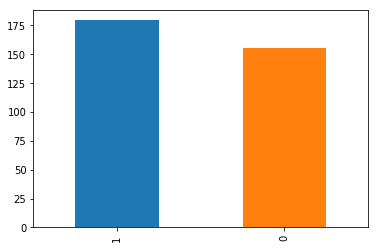

In [53]:
df['label'].value_counts().plot(kind='bar')

# Normalize  data

In [54]:

y = df['label']
X = df.drop(['label','date', 'Unnamed: 0'], axis=1)
X = X.values


#scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [55]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', LogisticRegression()) #step2 - classifier
])
pipeline.steps

[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False))]

# Split data

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(267, 24)
(67, 24)
(267,)
(67,)


# Estimate classifiers

In [57]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clfs = []
clfs.append(LogisticRegression(solver='lbfgs'))
clfs.append(SVC())
clfs.append(GaussianNB())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier(n_estimators=20))

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train, cv=3)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

---------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)
-----------------------------------
fit_time  mean  0.012243429819742838
fit_time  std  0.003966906707609287
score_time  mean  0.0012633005777994792
score_time  std  0.0007677777757361221
test_score  mean  0.5728303635607007
test_score  std  0.027188812774829013
train_score  mean  0.6516359805427384
train_score  std  0.010772255346174604
---------------------------------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
-----------------------------------
fit_time  mean  0.004533608754475911
fit_time  std  0.0014272860262449

In [58]:
from sklearn.model_selection import GridSearchCV
pipeline.set_params(clf= SVC())
pipeline.steps


[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))]

In [59]:
cv_grid = GridSearchCV(pipeline, param_grid = {
    'clf__kernel' : ['linear', 'rbf'],
    'clf__C' : np.linspace(0.1,1.2,12)
},cv=3)

cv_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__kernel': ['linear', 'rbf'], 'clf__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [60]:
cv_grid.best_params_

{'clf__C': 0.8999999999999999, 'clf__kernel': 'linear'}

In [61]:
cv_grid.best_estimator_

Pipeline(memory=None,
     steps=[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=0.8999999999999999, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [62]:
cv_grid.best_score_

0.5692883895131086

In [63]:
y_predict = cv_grid.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy*100))

Accuracy of the best classifier after CV is 56.716%


# Output

In [25]:
new_test_df = pd.DataFrame({'date':test_df['date'].values, 'label':pred})

In [15]:
new_test_df.to_csv('ML_Data/new_test_df.csv')